In [1]:
# -*- coding: utf-8 -*-
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#    http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
# implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

# EDA for the first time

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

# Iris dataset - Read the dataset from a file using Pandas

In [3]:
filename = "data/iris-data.csv"
df = pd.read_csv(filename, sep='\t')
df.head()

,"sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class"
0,"5.1,3.5,1.4,0.2,Iris-setosa"
1,"4.9,3,1.4,0.2,Iris-setosa"
2,"4.7,3.2,1.3,0.2,Iris-setosa"
3,"4.6,3.1,1.5,0.2,Iris-setosa"
4,"5,3.6,1.4,0.2,Iris-setosa"


**Some problem?**

In [4]:
%%bash
 head data/iris-data.csv

Couldn't find program: 'bash'


In [5]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
df = pd.read_csv(filename, sep=',')
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Identifikovať problémy v dátach = Práca v rámci predspracovania

**The word `class` ... hm ... Reserved Keywords in Python?"**

In [6]:
df.class.unique()

SyntaxError: invalid syntax (<ipython-input-6-bf9413a47d9e>, line 1)

In [7]:
df['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

**Rename the `class` column?**

In [8]:
df.rename(columns = {'class':'species'}, inplace = True)
df.species.unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

**Strange values, which look like human mistakes? Rename them? This operation *rename* can be dangerous**

In [9]:
df['species'] = df['species'].str.replace('Iris-setossa','setosa')
df['species'] = df['species'].str.replace('Iris-setosa','setosa')
df['species'] = df['species'].str.replace('Iris-versicolor','versicolor')
df['species'] = df['species'].str.replace('Iris-virginica','virginica')

In [10]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

**Shorter column names?**

In [11]:
df = df.rename({'sepal_length_cm': 'sepal_length', 'sepal_width_cm': 'sepal_width', 'petal_length_cm': 'petal_length', 'petal_width_cm': 'petal_width'}, axis='columns')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,2.3,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [12]:
df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

**Missing values? NaN values?**

In [13]:
df.shape[0]

150

In [14]:
df.dropna().shape[0]

145

In [15]:
df.shape[0] - df.dropna().shape[0]

5

In [16]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     5
species         0
dtype: int64

In [17]:
df.isnull().sum().sum()

5

In [18]:
df[df.isnull().any(axis=1)]

,sepal_length,sepal_width,petal_length,petal_width,species
7,5.0,3.4,1.5,NaN,setosa
8,4.4,2.9,1.4,NaN,setosa
9,4.9,3.1,1.5,NaN,setosa
10,5.4,3.7,1.5,NaN,setosa
11,4.8,3.4,1.6,NaN,setosa


## Save the dataframe to a file ...

In [19]:
df.to_csv('data/iris-data-output.tsv', sep='\t', index=False, encoding='utf-8')

# Visualization: Iris dataset

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [21]:
iris = sns.load_dataset("iris")

### Opísať dáta spolu s ich charakteristikami = Deskriptívna štatistika

In [22]:
iris.shape

(150, 5)

In [23]:
print(iris.head(10))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa


In [24]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [25]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [27]:
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

**Analýza jednotlivých atribútov - Univariate analysis** (Mean, Median, Modus, Variance, Standard Deviation)

In [28]:
iris['petal_length'].mean()

3.7580000000000005

In [29]:
iris['petal_length'].median()

4.35

In [30]:
stats.mode(iris['petal_length'])

ModeResult(mode=array([1.4]), count=array([13]))

In [31]:
np.var(iris['petal_length'])

3.0955026666666665

In [32]:
np.std(iris['petal_length'])

1.759404065775303

### Formulovať a overiť hypotézy o dátach 	 = Vizualizácia dát + inferenčná štatistika

<AxesSubplot:xlabel='sepal_length', ylabel='species'>

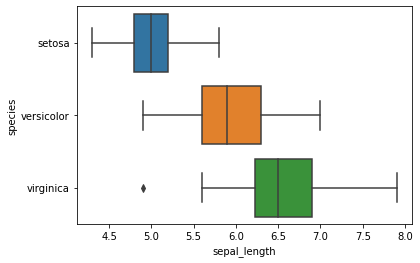

In [33]:
sns.boxplot(data=iris, x="sepal_length", y="species")

<AxesSubplot:xlabel='petal_length', ylabel='species'>

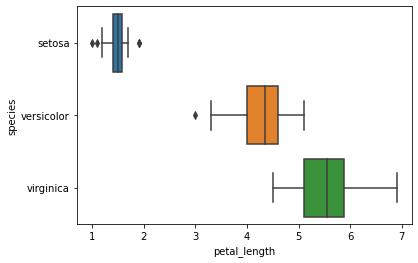

In [34]:
sns.boxplot(data=iris, x="petal_length", y="species")

sepal_length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal_width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal_length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal_width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

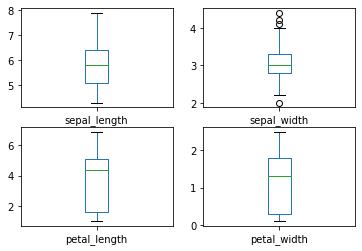

In [35]:
iris.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

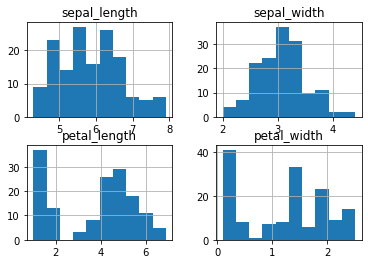

In [36]:
iris.hist()

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='petal_length', ylabel='Density'>

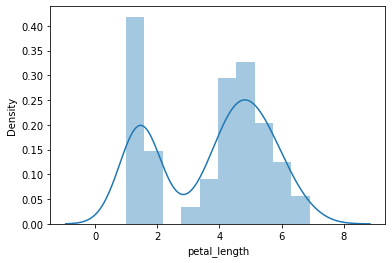

In [37]:
sns.distplot(iris['petal_length'], bins=10)

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='petal_width', ylabel='Density'>

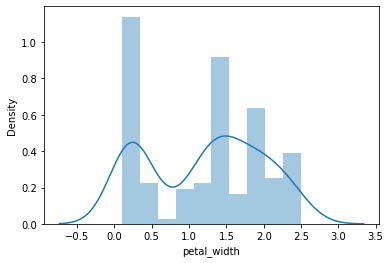

In [38]:
sns.distplot(iris['petal_width'], bins=10)

### Identifikovať vzťahy medzi atribútmi 	 = Závislosti napr. korelácie 
**Párová analýza - Bivariate analysis**

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

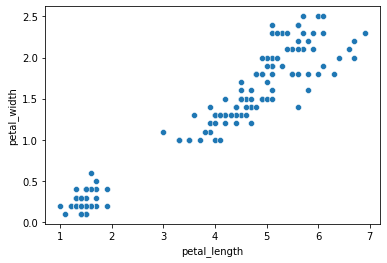

In [39]:
sns.scatterplot(data=iris, x='petal_length', y='petal_width')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

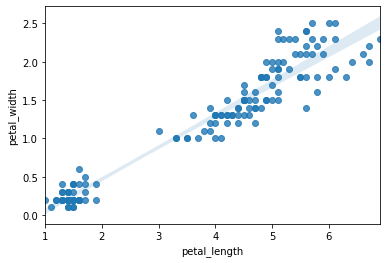

In [40]:
sns.regplot(x="petal_length", y="petal_width", data=iris)

In [41]:
print("Pearson correlation: %.3f" % iris.petal_length.corr(iris.petal_width))

Pearson correlation: 0.963


In [42]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


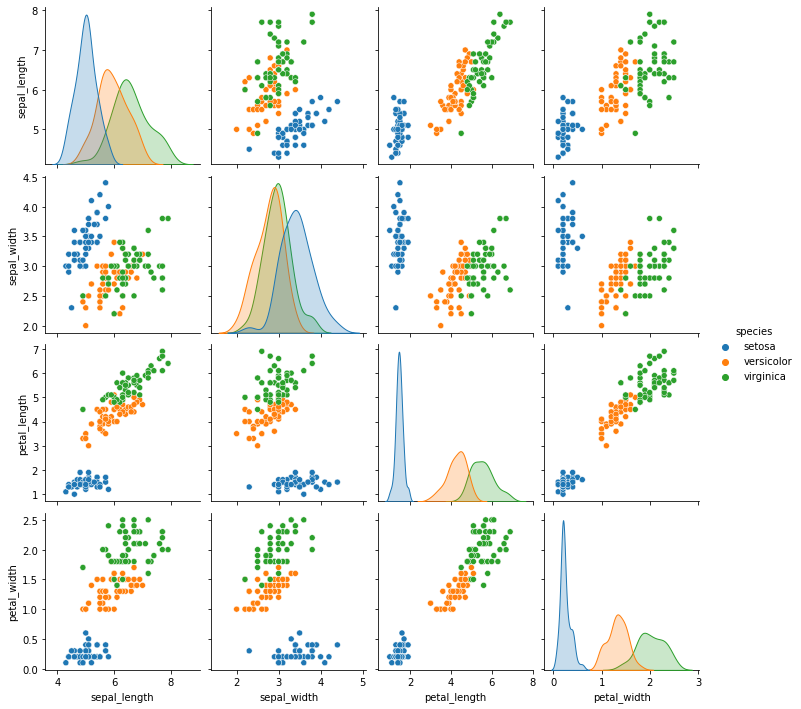

In [43]:
sns.pairplot(iris, hue="species")

<AxesSubplot:>

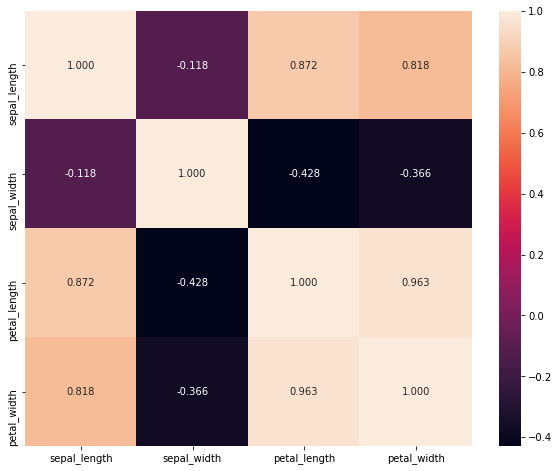

In [44]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(iris.corr(), ax=ax, annot=True, fmt=".3f")

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

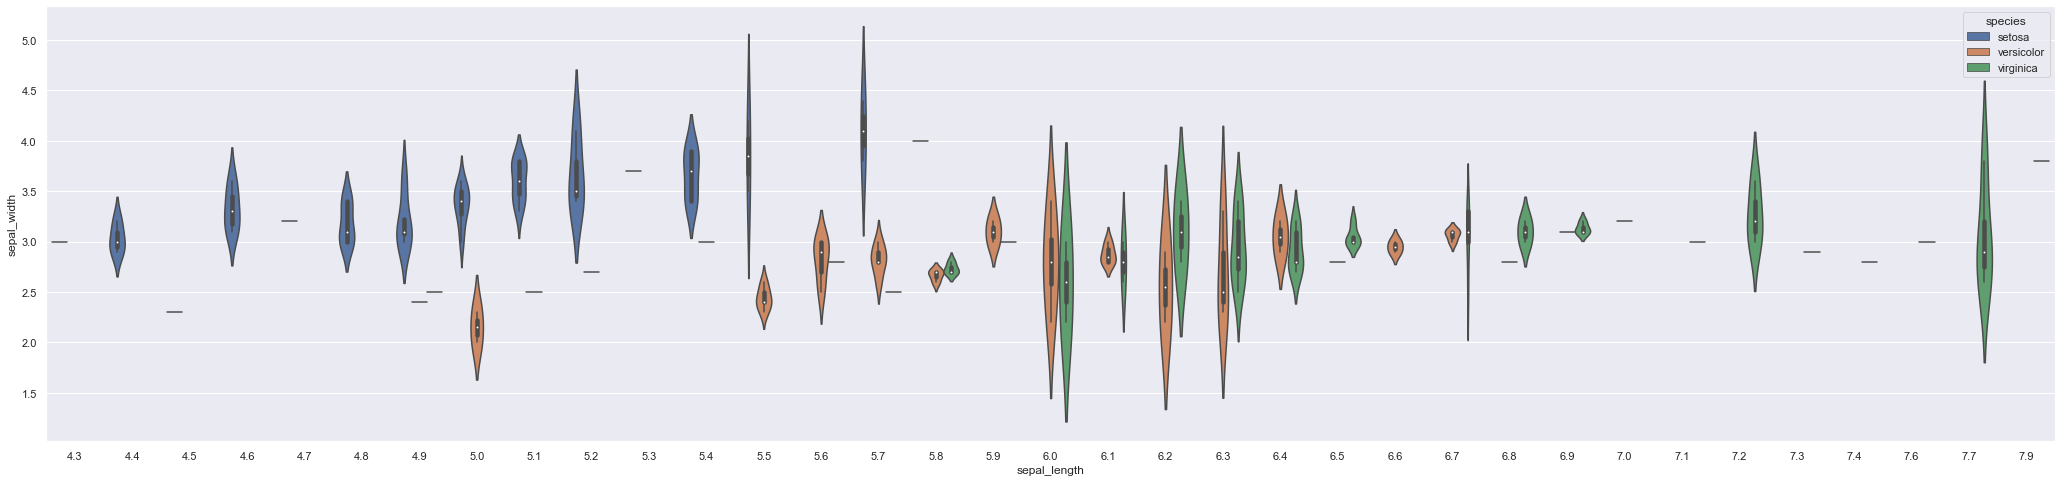

In [45]:
sns.set(rc={'figure.figsize':(36,8)})
sns.violinplot(data=iris, x='sepal_length', y='sepal_width', hue="species")

### Identifikovať problémy v dátach = Práca v rámci  predspracovania
**Remove missing values?**

In [46]:
iris.shape[0]

150

In [47]:
iris.dropna().shape[0]

150

In [48]:
iris.shape[0] - iris.dropna().shape[0]

0

**Empty rows?**

In [49]:
iris.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [50]:
iris[iris.isnull().any(axis=1)]

,sepal_length,sepal_width,petal_length,petal_width,species


# Visualization: Tips dataset

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [52]:
tips = sns.load_dataset("tips")
print(tips.shape)

(244, 7)


**Your code:**